In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings;
warnings.filterwarnings("ignore")
import re
pd.set_option("display.max_columns",None)

In [2]:
auto = pd.read_csv('missings_filled_step2.csv')
df = auto.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   make_model              15919 non-null  object 
 1   body_type               15919 non-null  object 
 2   price                   15919 non-null  int64  
 3   vat                     15919 non-null  object 
 4   km                      15919 non-null  float64
 5   registration            15919 non-null  float64
 6   prev_owner              15919 non-null  float64
 7   hp                      15919 non-null  float64
 8   Type                    15919 non-null  object 
 9   Inspection new          15919 non-null  object 
 10  Warranty(months)        15919 non-null  float64
 11  Body Color              15919 non-null  object 
 12  Paint Type              15919 non-null  object 
 13  Nr. of Doors            15919 non-null  float64
 14  Nr. of Seats            15919 non-null

def capping_outliers(s, whisker=1.5):
    “”"replace outliers with upper_bound and lower_bound values”“”
    indexes = s.dropna().index
    col = s.dropna()
    iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
    upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
    lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
    upper_bound = upper_bound if upper_bound < col.max() else col.max(),
    lower_bound = lower_bound if lower_bound > col.min() else col.min(),
    col = np.where(col > upper_bound, upper_bound,col)
    col = np.where(col < lower_bound, lower_bound,col)
    s[indexes]=col
    return s

### Column 2: Price

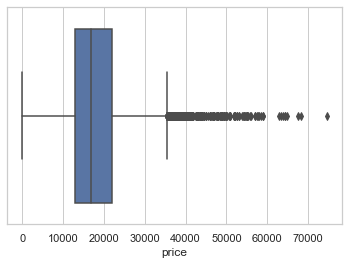

In [4]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [5]:
df.describe()

,price,km,registration,prev_owner,hp,Warranty(months),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight(kg),CO2 Emission(g CO2/km),Gears,Consumption_combined
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,18019.896727,32108.651722,2017.605377,0.998932,88.374144,6.684654,4.660657,4.952258,1425.261574,3.786733,1343.429927,117.514668,5.936994,4.876176
std,7386.169409,36968.174884,1.122170,0.326701,26.843513,13.330917,0.642198,0.476599,330.882580,0.418128,210.651964,19.959282,0.710864,1.557577
min,13.000000,0.000000,2016.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,12850.000000,2667.252119,2017.000000,1.000000,66.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1163.000000,104.000000,5.000000,4.100000
50%,16900.000000,20436.000000,2018.000000,1.000000,85.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1279.000000,117.000000,6.000000,4.800000
75%,21900.000000,46914.000000,2019.000000,1.000000,101.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1485.000000,128.000000,6.000000,5.400000
max,74600.000000,317000.000000,2019.000000,4.000000,294.000000,72.000000,7.000000,7.000000,16000.000000,8.000000,2471.000000,990.000000,9.000000,55.000000


In [6]:
df.drop((df[df.price < 4000].price.index), axis=0, inplace=True)

<AxesSubplot:xlabel='make_model', ylabel='price'>

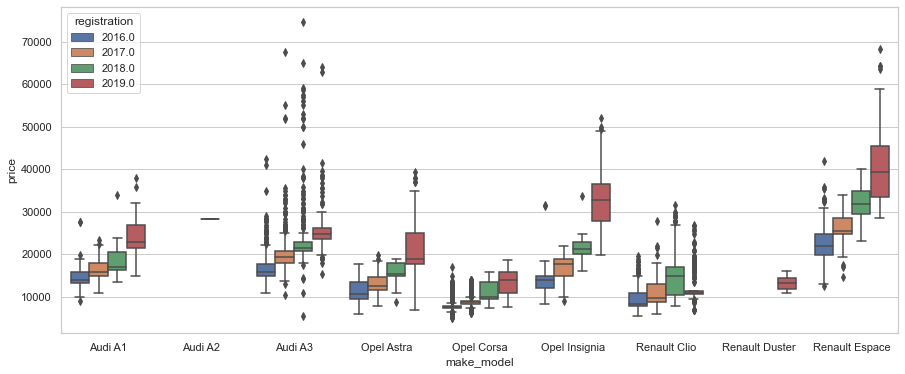

In [7]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price',data=df, x='make_model', hue='registration')

### Column : km

<AxesSubplot:xlabel='registration', ylabel='km'>

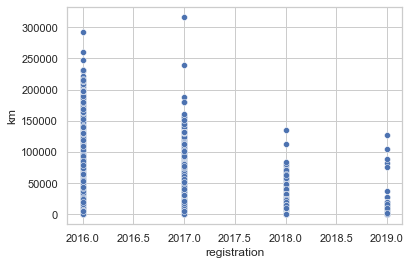

In [8]:
sns.scatterplot(data=df, x="registration", y="km")

### Column: registration

In [9]:
df.registration = 2019 - df.registration

### Column: pre_owner

In [10]:
df.prev_owner.value_counts(dropna=False)

1.0    14283
0.0      835
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

### Column: hp

<AxesSubplot:xlabel='hp', ylabel='price'>

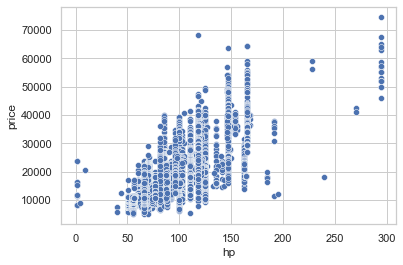

In [11]:
sns.scatterplot(data=df, x="hp", y="price")

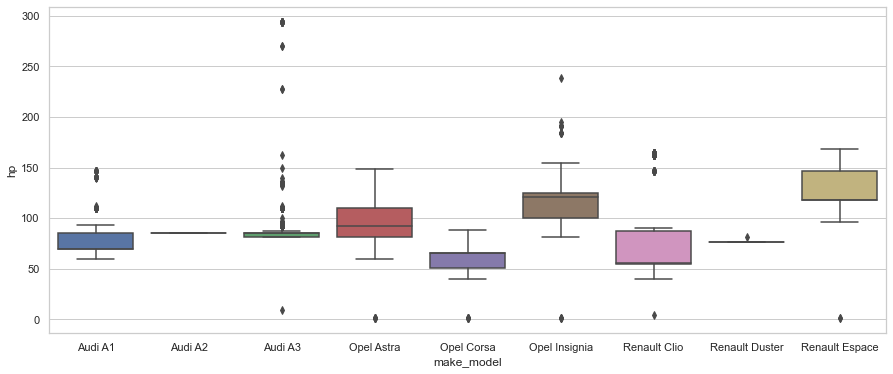

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(y='hp',data=df, x='make_model');

In [13]:
df[df['hp'] < 50].hp.value_counts(dropna=False)

1.0     20
40.0     2
4.0      1
44.0     1
9.0      1
Name: hp, dtype: int64

In [14]:
df.loc[df['hp']<50,'hp'] = np.nan

In [15]:
mode_hp = df.groupby(['make_model','body_type','Displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp)

mode_hp1 = df.groupby(['make_model','Displacement'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp1)

mode_hp2 = df.groupby(['make_model','body_type'])['hp']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["hp"] = df["hp"].fillna(mode_hp2)

In [16]:
df.hp.isnull().sum()

0

### Column: Warranty(months)

In [17]:
df['Warranty(months)'].value_counts(dropna=False)

0.0     11062
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
26.0        4
50.0        4
16.0        4
1.0         3
4.0         3
34.0        3
19.0        3
13.0        3
11.0        2
21.0        2
14.0        2
17.0        2
45.0        2
46.0        2
9.0         2
22.0        2
28.0        2
56.0        1
47.0        1
10.0        1
8.0         1
7.0         1
40.0        1
33.0        1
65.0        1
15.0        1
30.0        1
49.0        1
Name: Warranty(months), dtype: int64

### Column: Nr. of Doors

In [18]:
df['Nr. of Doors'].value_counts(dropna=False)

5.0    11784
4.0     3079
3.0      831
2.0      219
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [19]:
df[df['Nr. of Doors'] == 7.0]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
15202,Renault Espace,Van,21600,Price negotiable,78000.0,3.0,1.0,118.0,Used,No,0.0,Brown,Metallic,7.0,5.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'MP3', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...",[],6.0,4.6


In [20]:
df.loc[(df['make_model'] == 'Renault Espace') & (df['body_type'] == 'Van'), ['Nr. of Doors']].value_counts()

Nr. of Doors
5.0             712
4.0              90
7.0               1
dtype: int64

In [21]:
df.loc[df['Nr. of Doors']==1,'Nr. of Doors'] = 5

In [22]:
df.loc[df['Nr. of Doors']==7,'Nr. of Doors'] = 5

### Column: Nr. of Seats

In [23]:
df['Nr. of Seats'].value_counts(dropna=False)

5.0    14304
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [24]:
df[df['Nr. of Seats']==6]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
582,Audi A1,Compact,13500,VAT deductible,100000.000000,2.0,1.0,70.0,Used,No,12.0,White,Metallic,5.0,6.0,Manual,1000.0,4.0,1500.0,front,Benzine,111.0,Euro 6,['Air conditioning'],['On-board computer'],['Alloy wheels'],['ABS'],"['\nAUTO SPEZIAL CONCESIONARIO MULTI-MARCA ', ...",5.0,4.9
15890,Renault Espace,Station wagon,42490,VAT deductible,1144.411765,0.0,1.0,147.0,New,No,0.0,Black,Metallic,5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...","['\n', 'Wir freuen uns über Ihr Interesse am h...",6.0,5.7


In [25]:
df.loc[df['Nr. of Seats']==3,'Nr. of Seats'] = 4

### Column: Displacement

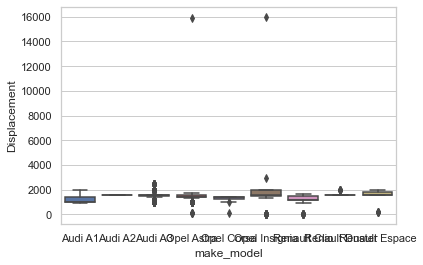

In [26]:
sns.boxplot(y='Displacement',data=df, x='make_model');

In [27]:
df[df.Displacement > 5000].Displacement = 1600

In [28]:
df[df.Displacement < 600].Displacement = np.nan

In [29]:
mode_disp = df.groupby(['make_model','body_type','hp'])['Displacement']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

df["Displacement"] = df["Displacement"].fillna(mode_disp)

In [30]:
df.Displacement.isnull().sum()

0

### Column: Cylinders

<AxesSubplot:xlabel='make_model', ylabel='Cylinders'>

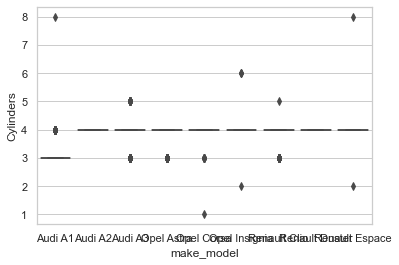

In [31]:
sns.boxplot(y='Cylinders',data=df, x='make_model')

In [32]:
df.Cylinders.value_counts(dropna=False)

4.0    12463
3.0     3422
5.0       22
6.0        3
2.0        2
8.0        2
1.0        1
Name: Cylinders, dtype: int64

In [33]:
df.loc[df.Cylinders == 8.0, 'Cylinders'] = 4

In [34]:
df.Cylinders.value_counts(dropna=False)

4.0    12465
3.0     3422
5.0       22
6.0        3
2.0        2
1.0        1
Name: Cylinders, dtype: int64

In [35]:
df[(df.Cylinders == 2.0) | (df.Cylinders == 1.0)]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
9956,Opel Corsa,Compact,16625,VAT deductible,100.0,0.0,1.0,66.0,Pre-registered,No,0.0,Black,Metallic,3.0,5.0,Automatic,1398.0,1.0,1163.0,front,Benzine,140.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Sport suspension']","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Getriebe:', ' Automatik', 'Technik:', ...",6.0,6.0
11342,Opel Insignia,Station wagon,21900,VAT deductible,13600.0,1.0,1.0,100.0,Employee's car,No,0.0,Grey,Metallic,5.0,5.0,Automatic,1598.0,2.0,1503.0,front,Diesel,114.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Catalytic Converter', 'Touch...","['ABS', 'Central door lock with remote control...",[],6.0,5.0
15835,Renault Espace,Van,47590,VAT deductible,6000.0,0.0,1.0,147.0,Employee's car,No,0.0,Black,Metallic,5.0,7.0,Automatic,1997.0,2.0,1840.0,front,Diesel,139.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Hands-free equipment', 'On-boar...",['Voice Control'],"['ABS', 'Alarm system', 'Blind spot monitor', ...",['\nGarantie 24 Monate ab Tag der Erstzulassun...,6.0,5.3


In [36]:
df.loc[df.Cylinders == 2.0, 'Cylinders'] = 4

In [37]:
df.loc[df.Cylinders == 1.0, 'Cylinders'] = 4

In [38]:
df.Cylinders.value_counts(dropna=False)

4.0    12468
3.0     3422
5.0       22
6.0        3
Name: Cylinders, dtype: int64

### Column: Weight(kg)

In [39]:
df['Weight(kg)'].value_counts(dropna=False)

1163.0    1518
1360.0    1047
1135.0     877
1503.0     660
1425.0     604
          ... 
1332.0       1
1764.0       1
1058.0       1
1797.0       1
1649.0       1
Name: Weight(kg), Length: 434, dtype: int64

<AxesSubplot:xlabel='make_model', ylabel='Weight(kg)'>

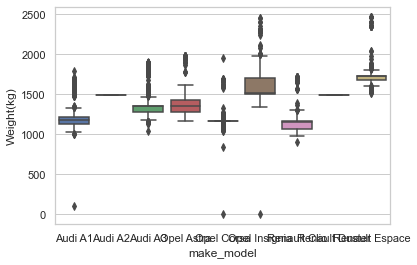

In [40]:
sns.boxplot(y='Weight(kg)',data=df, x='make_model')

In [41]:
df[df['Weight(kg)']<500]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
1143,Audi A1,Compact,19229,VAT deductible,8263.0,1.0,1.0,70.0,Used,Yes,36.0,Beige,Metallic,5.0,4.0,Automatic,999.0,3.0,102.0,front,Benzine,102.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Catalytic Converter', 'Sport...","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Getriebe:', ' Automatik', 'Technik:', ...",7.0,4.6
8355,Opel Corsa,Compact,12945,VAT undeductible,2015.0,1.0,1.0,66.0,Used,Yes,0.0,Silver,Metallic,5.0,5.0,Automatic,1398.0,4.0,1.0,front,Benzine,112.0,Euro 6,"['Air conditioning', 'Electrical side mirrors'...",['Radio'],['Catalytic Converter'],"['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Getriebe:', ' Automatik', 'Technik:', ...",5.0,4.8
12779,Opel Insignia,Station wagon,39299,VAT deductible,10.0,0.0,1.0,121.0,New,No,0.0,Black,Metallic,5.0,5.0,Manual,1500.0,4.0,1.0,front,Benzine,140.0,Euro 6,"['Heated steering wheel', 'Hill Holder', 'Park...",NaN,NaN,"['Fog lights', 'Lane departure warning system']","['\nWat een machine, een cockpit waar een pilo...",6.0,6.0


In [42]:
df[df['make_model'] == 'Audi A1']['Weight(kg)'].mean()

1202.9491201224178

In [43]:
df.loc[1143, 'Weight(kg)'] = 1202

In [44]:
df[df['make_model'] == 'Opel Corsa']['Weight(kg)'].mean()

1169.9864620938629

In [45]:
df.loc[8355, 'Weight(kg)'] = 1169

In [46]:
df[df['make_model'] == 'Opel Insignia']['Weight(kg)'].mean()

1588.4661277906082

In [47]:
df.loc[12779, 'Weight(kg)'] = 1508

In [48]:
df[df['Weight(kg)']<500]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined


### Column: CO2 Emission(g CO2/km)

<AxesSubplot:xlabel='make_model', ylabel='CO2 Emission(g CO2/km)'>

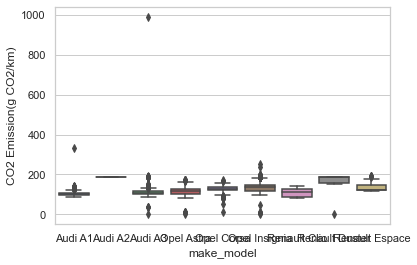

In [49]:
sns.boxplot(y='CO2 Emission(g CO2/km)',data=df, x='make_model')

In [50]:
df[df['CO2 Emission(g CO2/km)']>300]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
535,Audi A1,Compact,12990,VAT undeductible,41200.0,3.0,1.0,70.0,Used,Yes,0.0,Silver,Metallic,5.0,5.0,Manual,999.0,4.0,1135.0,front,Benzine,331.0,Euro 4,"['Air conditioning', 'Automatic climate contro...",NaN,"['Ski bag', 'Sport suspension']","['ABS', 'Alarm system', 'Central door lock', '...","[""\nFlorettesilber, Sport-Lederlenkrad mit Mul...",5.0,13.0
4556,Audi A3,Sedans,23500,VAT deductible,27815.0,1.0,1.0,81.0,Used,No,0.0,Grey,Metallic,5.0,5.0,Automatic,1598.0,4.0,1360.0,front,Diesel,990.0,Euro 6,"['Multi-function steering wheel', 'Park Distan...",['Bluetooth'],NaN,"['ABS', 'Central door lock', 'Power steering',...",['\nVETTURA APSP GARANZIA 48 MESI Airbag per l...,7.0,38.0


In [51]:
df.loc[[535, 4556], 'CO2 Emission(g CO2/km)'] = np.nan

In [52]:
df[df['CO2 Emission(g CO2/km)']<70]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
3612,Audi A3,Sedans,38450,Price negotiable,13800.000000,1.0,1.0,110.0,Used,No,0.0,Black,Metallic,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Digital radio', 'H...","['Alloy wheels', 'Sport package', 'Sport seats...","['ABS', 'Adaptive Cruise Control', 'Alarm syst...",['\nAuto come nuova km certificati tutti gli o...,6.0,1.60
3615,Audi A3,Sedans,35899,VAT undeductible,20880.000000,1.0,1.0,110.0,Used,No,0.0,White,Metallic,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,"['Air conditioning', 'Power windows', 'Seat ve...","['Bluetooth', 'Radio']",['Alloy wheels'],"['ABS', 'Adaptive Cruise Control', 'Alarm syst...","['\nfull optional ', 'Cruise control adattativ...",6.0,1.60
3617,Audi A3,Sedans,38000,Price negotiable,12000.000000,1.0,1.0,110.0,Used,No,0.0,Grey,Metallic,5.0,5.0,Semi-automatic,1395.0,4.0,1615.0,front,Benzine,36.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Digital radio', 'H...","['Alloy wheels', 'Shift paddles', 'Sport packa...","['ABS', 'Adaptive Cruise Control', 'Adaptive h...",['\nAuto parla da sola è full optional il pass...,6.0,1.60
4089,Audi A3,Sedans,19500,VAT deductible,23644.000000,1.0,1.0,85.0,Used,No,0.0,Blue,Metallic,5.0,5.0,Manual,1598.0,4.0,1360.0,front,Diesel,1.0,Euro 6,NaN,"['Bluetooth', 'On-board computer']",NaN,"['ABS', 'Central door lock', 'Power steering',...",['\nAudi A3 Sportback 1.6 TDI SPORT Climatizza...,6.0,40.00
5818,Opel Astra,Sedans,14990,VAT deductible,85182.000000,3.0,1.0,110.0,Used,No,0.0,Brown,Metallic,5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'MP3', '...","['Alloy wheels', 'Catalytic Converter']","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Getriebe:', ' Automatik', 'Technik:', ...",6.0,5.10
6397,Opel Astra,Sedans,6950,VAT undeductible,88000.000000,0.0,1.0,81.0,Used,No,0.0,Grey,Metallic,5.0,5.0,Manual,1598.0,4.0,1425.0,front,Diesel,5.0,Euro 6,"['Air conditioning', 'Leather steering wheel',...",['CD player'],['Alloy wheels'],"['ABS', 'Central door lock', 'Driver-side airb...","['\n', 'Dotazioni:', ""ABS, Airbag a tendina pe...",6.0,4.50
6578,Opel Astra,Station wagon,17850,VAT deductible,29900.000000,1.0,1.0,110.0,Used,Yes,0.0,Green,Metallic,5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Roof ...","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Getriebe', ': Automatik', ' ', 'Techni...",6.0,5.10
6579,Opel Astra,Station wagon,17850,VAT deductible,29900.000000,1.0,1.0,110.0,Used,Yes,0.0,Green,Metallic,5.0,5.0,Automatic,1399.0,4.0,1278.0,front,Benzine,12.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Roof ...","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Getriebe', ': Automatik', ' ', 'Techni...",6.0,5.10
8110,Opel Astra,Station wagon,18380,VAT deductible,1020.000000,0.0,1.0,77.0,Used,Yes,60.0,Silver,Metallic,5.0,5.0,Manual,999.0,3.0,1273.0,front,Benzine,14.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...",['Alloy wheels'],"['ABS', 'Central door lock', 'Daytime running ...","['\nIhr Ansprechpartner für dieses KFZ:', ' ',...",5.0,5.00
8217,Opel Astra,Sedans,17850,VAT deductible,4500.000000,0.0,1.0,92

In [53]:
df.loc[df[df['CO2 Emission(g CO2/km)']<70].index, 'CO2 Emission(g CO2/km)'] = np.nan

In [54]:
df['CO2 Emission(g CO2/km)'].isnull().sum()

21

In [55]:
mode_CO2 = df.groupby(['make_model','Displacement'])['CO2 Emission(g CO2/km)']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission(g CO2/km)'] = df['CO2 Emission(g CO2/km)'].fillna(mode_CO2)
mode_CO2_1 = df.groupby(['make_model'])['CO2 Emission(g CO2/km)']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission(g CO2/km)'] = df['CO2 Emission(g CO2/km)'].fillna(mode_CO2_1)
mode_CO2_2 = df.groupby(['body_type'])['CO2 Emission(g CO2/km)']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['CO2 Emission(g CO2/km)'] = df['CO2 Emission(g CO2/km)'].fillna(mode_CO2_2)

In [56]:
df['CO2 Emission(g CO2/km)'].isnull().sum()

0

<AxesSubplot:xlabel='make_model', ylabel='CO2 Emission(g CO2/km)'>

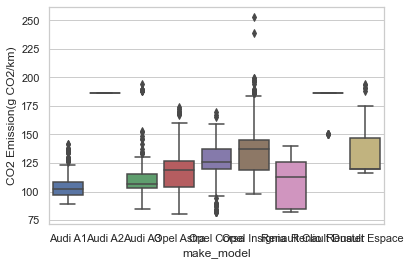

In [57]:
sns.boxplot(y='CO2 Emission(g CO2/km)',data=df, x='make_model')

### Column: Gears

In [58]:
df.Gears.value_counts(dropna=False)

6.0    8614
5.0    4254
7.0    2810
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: Gears, dtype: int64

In [59]:
df.loc[df[df['Gears']<5].index, 'Gears'] = 5

### Column: Consumption_combined

<AxesSubplot:xlabel='make_model', ylabel='Consumption_combined'>

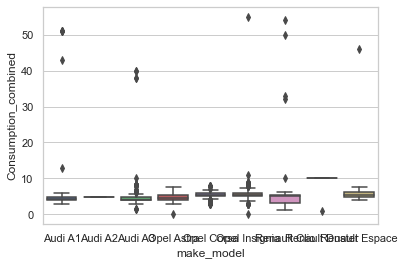

In [60]:
sns.boxplot(y='Consumption_combined',data=df, x='make_model')

In [61]:
df.loc[(df['Consumption_combined']>20)|(df['Consumption_combined']<3), 'Consumption_combined'] = np.nan

In [62]:
df['Consumption_combined'].isnull().sum()

22

In [63]:
mode_Cons= df.groupby(['CO2 Emission(g CO2/km)'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons)
mode_Cons1= df.groupby(['Displacement'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons1)
mode_Cons2= df.groupby(['make_model'])['Consumption_combined']\
              .transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)
df['Consumption_combined'] = df['Consumption_combined'].fillna(mode_Cons2)

In [64]:
df['Consumption_combined'].isnull().sum()

0

<AxesSubplot:xlabel='make_model', ylabel='Consumption_combined'>

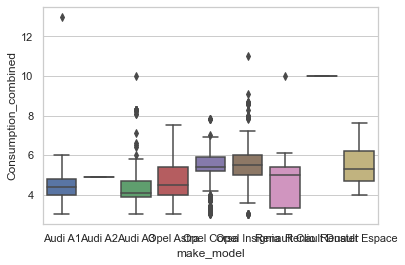

In [65]:
sns.boxplot(y='Consumption_combined',data=df, x='make_model')

In [66]:
df.describe()

,price,km,registration,prev_owner,hp,Warranty(months),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight(kg),CO2 Emission(g CO2/km),Gears,Consumption_combined
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32116.363102,1.394848,0.998932,88.494376,6.686334,4.660823,4.952309,1425.306001,3.786742,1343.702796,117.580961,5.938109,4.839978
std,7381.679318,36969.600432,1.122193,0.326742,26.662389,13.332171,0.641214,0.476467,330.886751,0.414349,209.900637,18.326474,0.707242,0.928670
min,4950.000000,0.000000,0.000000,0.000000,51.000000,0.000000,2.000000,2.000000,1.000000,3.000000,840.000000,80.000000,5.000000,3.000000
25%,12850.000000,2669.504237,0.000000,1.000000,66.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1163.000000,104.000000,5.000000,4.100000
50%,16900.000000,20450.000000,1.000000,1.000000,85.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1279.000000,117.000000,6.000000,4.800000
75%,21900.000000,46928.000000,2.000000,1.000000,102.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1485.000000,128.000000,6.000000,5.400000
max,74600.000000,317000.000000,3.000000,4.000000,294.000000,72.000000,5.000000,7.000000,16000.000000,6.000000,2471.000000,253.000000,9.000000,13.000000


### Some Additional Changes in Type Column

In [67]:
df[(df.Type == 'New') & (df['km']>10000)]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
15503,Renault Espace,Van,32498,VAT deductible,19356.052262,1.0,1.0,118.0,New,No,24.0,White,Metallic,5.0,7.0,Automatic,1598.0,4.0,1734.0,front,Diesel,120.0,Euro 6,"['Air conditioning', 'Automatic climate contro...",['On-board computer'],NaN,"['ABS', 'Central door lock', 'Electronic stabi...","['\n*Pack Cruising', '*Véhicule 100% neuf, prê...",6.0,5.4


In [68]:
df[(df.km > 1000) & (df.Type == 'New')]

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Type,Inspection new,Warranty(months),Body Color,Paint Type,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight(kg),Drive chain,Fuel,CO2 Emission(g CO2/km),Emission Class,Comfort&Convenience,Entertainment&Media,Extras,Safety & Security,description,Gears,Consumption_combined
743,Audi A1,Sedans,25900,VAT undeductible,1830.050866,0.0,0.0,85.0,New,No,0.0,Black,Metallic,5.0,4.0,Semi-automatic,999.0,3.0,1255.0,front,Benzine,108.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'CD player', 'Digital radio', 'H...","['Alloy wheels', 'Sport suspension', 'Touch sc...","['ABS', 'Alarm system', 'Central door lock', '...","['\n', 'NUOVA AUDI A1! VETTURA UFFICIALE ITA I...",7.0,4.8
869,Audi A1,Sedans,21300,VAT deductible,1830.050866,0.0,0.0,85.0,New,No,24.0,White,Metallic,5.0,4.0,Automatic,999.0,3.0,1165.0,front,Benzine,102.0,Euro 6,"['Air conditioning', 'Power windows']",['Radio'],['Alloy wheels'],"['ABS', 'Central door lock', 'Driver-side airb...","['\nAirbag anteriori e laterali per la testa, ...",7.0,4.4
977,Audi A1,Compact,21200,VAT deductible,1830.050866,0.0,1.0,85.0,New,No,0.0,White,Metallic,4.0,4.0,Automatic,999.0,3.0,1135.0,front,Benzine,110.0,Euro 6,"['Air conditioning', 'Electrical side mirrors'...","['Bluetooth', 'Hands-free equipment', 'Radio',...",['Alloy wheels'],"['ABS', 'Central door lock', 'Daytime running ...","['\n- über 50 Jahren Opel - Partner', '- Vertr...",7.0,4.8
980,Audi A1,Compact,21100,VAT undeductible,1830.050866,0.0,0.0,85.0,New,No,0.0,Yellow,Metallic,5.0,5.0,Automatic,999.0,4.0,1135.0,front,Benzine,97.0,Euro 6,"['Air conditioning', 'Heads-up display', 'Powe...",['Radio'],['Alloy wheels'],"['ABS', 'Alarm system', 'Central door lock', '...","['\n', '""X-STYLE l’alternativa di successo""', ...",6.0,4.2
1064,Audi A1,Compact,20380,VAT deductible,1830.050866,0.0,1.0,85.0,New,No,0.0,White,Metallic,4.0,4.0,Automatic,999.0,3.0,1135.0,front,Benzine,108.0,Euro 6,"['Air conditioning', 'Electrical side mirrors'...","['Bluetooth', 'On-board computer', 'Radio']",['Touch screen'],"['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Garantie 3 Jahre / 90.000 KM Laufleist...",7.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15888,Renault Espace,Van,47990,VAT deductible,2159.427184,0.0,1.0,165.0,New,No,0.0,Brown,Metallic,5.0,5.0,Automatic,1798.0,4.0,1685.0,front,Benzine,153.0,Euro 6,"['Air conditioning', 'Automatic climate contro...",NaN,"['Alloy wheels', 'Touch screen']","['ABS', 'Daytime running lights', 'Driver-side...","['\n', 'Komfort:', ' ', 'abgedunkelte Scheiben...",7.0,6.8
15890,Renault Espace,Station wagon,42490,VAT deductible,1144.411765,0.0,1.0,147.0,New,No,0.0,Black,Metallic,5.0,6.0,Automatic,1997.0,4.0,1840.0,front,Diesel,168.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Touch screen']","['ABS', 'Blind spot monitor', 'Central door lo...","['\n', 'Wir freuen uns über Ihr Interesse am h...",6.0,5.7
15902,Renault Espace,Sedans,41043,VAT deductible,1144.411765,0.0,1.0,147.0,New,No,0.0,Black,Metallic,4.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,139.0,Euro 6,"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Roof rack', 'Touch screen', ...","['ABS', 'Blind spot monitor', 'Central door lo...","['\n12V Anschluss, 19"" Leichtmetallfelgen, ABS...",6.0,5.3
15912,Renault Espace,Van,39950,VAT deductible,1144.411765,0.0,1.0,147.0,New,No,24.0,Black,Metallic,5.0,5.0,Automatic,1997.0,4.0,1758.0,front,Diesel,139.0,Euro 6,"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Digital radio', 'Hands-free equ...","['Alloy wheels', 'Touch screen']","['ABS', 'Central door lock', 'Central door loc...",['\nVettura visionabile nella sede in Via Roma...,6.0,5.3


In [69]:
df.loc[df[(df.registration > 0) & (df.Type == 'New')].index, 'Type'] = 'Used'

In [70]:
df.describe()

,price,km,registration,prev_owner,hp,Warranty(months),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight(kg),CO2 Emission(g CO2/km),Gears,Consumption_combined
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32116.363102,1.394848,0.998932,88.494376,6.686334,4.660823,4.952309,1425.306001,3.786742,1343.702796,117.580961,5.938109,4.839978
std,7381.679318,36969.600432,1.122193,0.326742,26.662389,13.332171,0.641214,0.476467,330.886751,0.414349,209.900637,18.326474,0.707242,0.928670
min,4950.000000,0.000000,0.000000,0.000000,51.000000,0.000000,2.000000,2.000000,1.000000,3.000000,840.000000,80.000000,5.000000,3.000000
25%,12850.000000,2669.504237,0.000000,1.000000,66.000000,0.000000,4.000000,5.000000,1229.000000,4.000000,1163.000000,104.000000,5.000000,4.100000
50%,16900.000000,20450.000000,1.000000,1.000000,85.000000,0.000000,5.000000,5.000000,1461.000000,4.000000,1279.000000,117.000000,6.000000,4.800000
75%,21900.000000,46928.000000,2.000000,1.000000,102.000000,12.000000,5.000000,5.000000,1598.000000,4.000000,1485.000000,128.000000,6.000000,5.400000
max,74600.000000,317000.000000,3.000000,4.000000,294.000000,72.000000,5.000000,7.000000,16000.000000,6.000000,2471.000000,253.000000,9.000000,13.000000


In [71]:
df.to_csv('Capstone_stage3.csv', index = False)